In [2]:
# Import libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
import os
from google.colab import drive

drive.mount('/content/drive')
#drive.mount("/content/drive", force_remount=True)
RAV = "/content/drive/MyDrive/Colab Notebooks/RAVDESS Emotional Speech Audio/Audio_Speech_Actors_01-24/"
SAVEE = "/content/drive/MyDrive/Colab Notebooks/Savee/ALL/"

dir_list = os.listdir(SAVEE)
print(dir_list[0:5])


Mounted at /content/drive
['DC_a01.wav', 'DC_a03.wav', 'DC_a07.wav', 'DC_a14.wav', 'DC_a09.wav']


In [4]:
import pandas as pd
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error')
    path.append(SAVEE + i)

# Now check out the label count distribution
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

labels
male_neutral     120
male_angry        60
male_happy        60
male_fear         60
male_disgust      60
male_sad          60
male_surprise     60
Name: count, dtype: int64

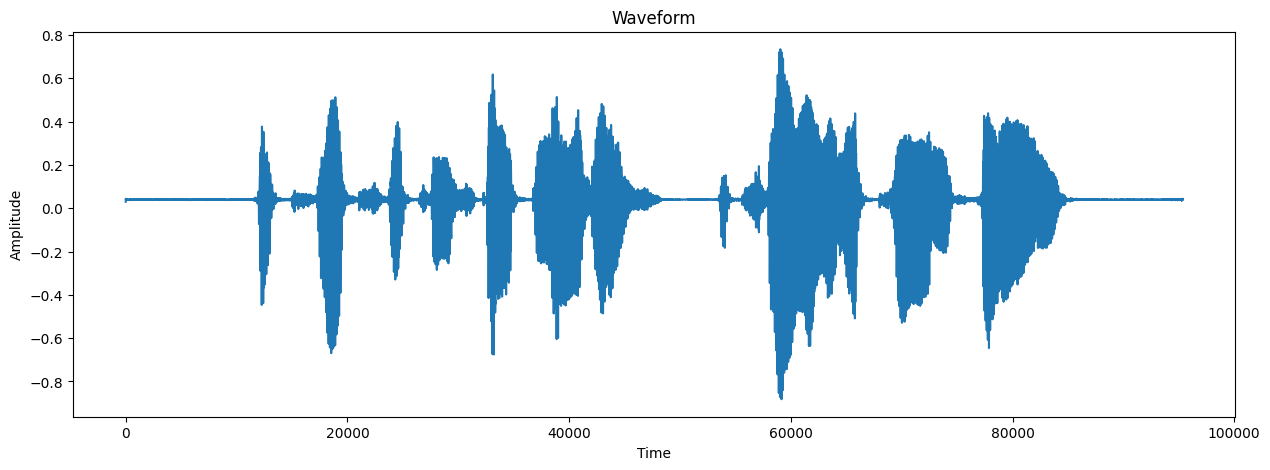

In [5]:
# Lets play a Angry track
# use the well known Librosa library for this task
import librosa
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Audio

SAVEE = "/content/drive/MyDrive/Colab Notebooks/Savee/ALL/"

# Load the audio file
fname = SAVEE + 'DC_f11.wav'
data, sr = librosa.load(fname)

# Plot the waveform using matplotlib
plt.figure(figsize=(15, 5))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()

# Play the audio
Audio(data, rate=sr)


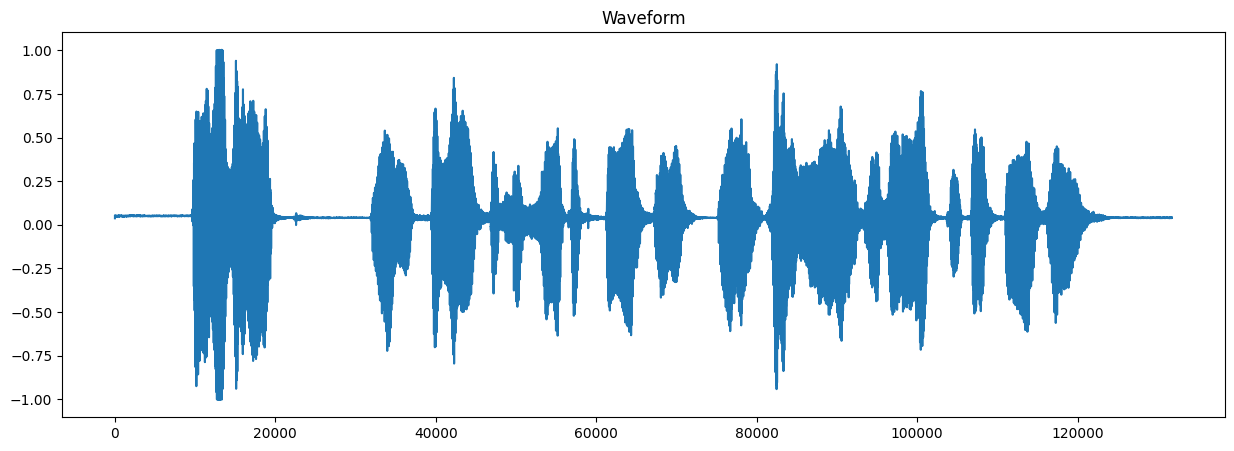

In [6]:
# Lets play a happy track
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

SAVEE = "/content/drive/MyDrive/Colab Notebooks/Savee/ALL/"

# load audio file
fname = SAVEE + 'DC_h11.wav'
data, sampling_rate = librosa.load(fname)

# Close any existing plot windows
plt.close()

# plot waveform
plt.figure(figsize=(15, 5))
plt.plot(data)
plt.title('Waveform')

# play audio
ipd.display(ipd.Audio(data, rate=sampling_rate))


In [7]:
import os
import pandas as pd

RAV = "/content/drive/MyDrive/Colab Notebooks/RAVDESS Emotional Speech Audio/Audio_Speech_Actors_01-24"
dir_list = [d for d in os.listdir(RAV) if os.path.isdir(os.path.join(RAV, d))]
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(os.path.join(RAV, i))
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6].split()[0])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(os.path.join(RAV, i, f))


RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()


labels
female_neutral     145
male_neutral       144
female_angry        97
female_fear         97
female_happy        97
male_sad            96
male_angry          96
male_fear           96
male_disgust        96
male_happy          96
female_sad          96
male_surprise       96
female_disgust      96
female_surprise     96
Name: count, dtype: int64

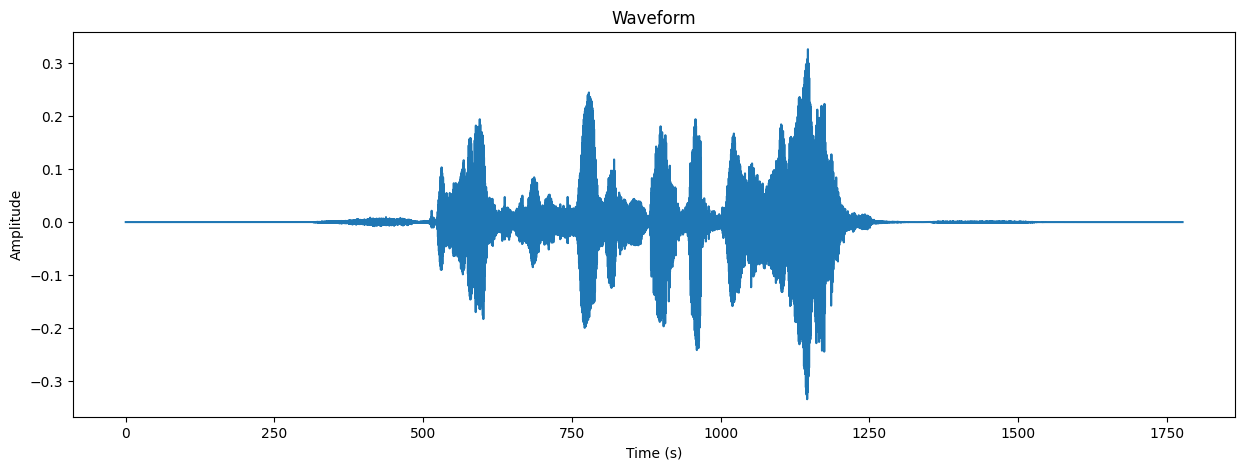

In [8]:
# Pick a fearful track
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd

RAV = "/content/drive/MyDrive/Colab Notebooks/RAVDESS Emotional Speech Audio/Audio_Speech_Actors_01-24/"

# Pick a fearful track
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'
data, sampling_rate = librosa.load(fname)

# Get time array for x-axis
time = librosa.times_like(data)

# Plot waveform using matplotlib
plt.figure(figsize=(15, 5))
plt.plot(time, data)

# Set title and labels
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Display audio
ipd.Audio(fname)


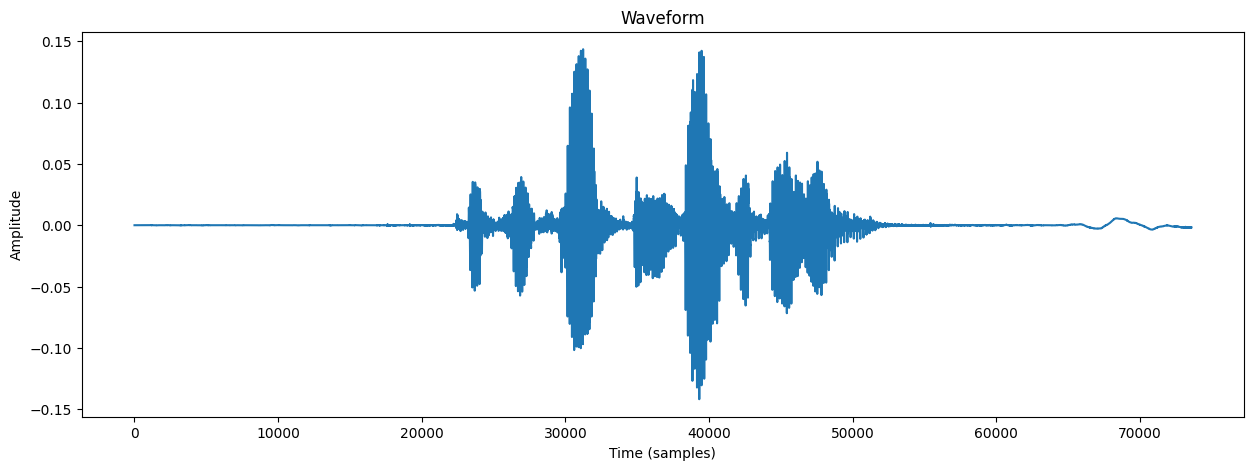

In [9]:
# Pick a happy track
import librosa
import matplotlib.pyplot as plt
fname = RAV + 'Actor_15/03-01-03-01-01-02-15.wav'
# Load the audio file
data, sr = librosa.load(fname)

# Plot the waveform
plt.figure(figsize=(15, 5))
plt.plot(data)
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()

# Lets play the audio
ipd.Audio(fname)


In [10]:
import pandas as pd
df = pd.concat([SAVEE_df, RAV_df], axis = 0)
print(df.labels.value_counts())
print(df.head())
df.to_csv("Data_path.csv",index=False)


labels
male_neutral       264
male_angry         156
male_happy         156
male_fear          156
male_disgust       156
male_sad           156
male_surprise      156
female_neutral     145
female_happy        97
female_angry        97
female_fear         97
female_sad          96
female_disgust      96
female_surprise     96
Name: count, dtype: int64
       labels source                                               path
0  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...
1  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...
2  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...
3  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...
4  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...


In [11]:
# Import our libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os
import IPython.display as ipd  # To play sound in the notebook

In [12]:
!pip install librosa


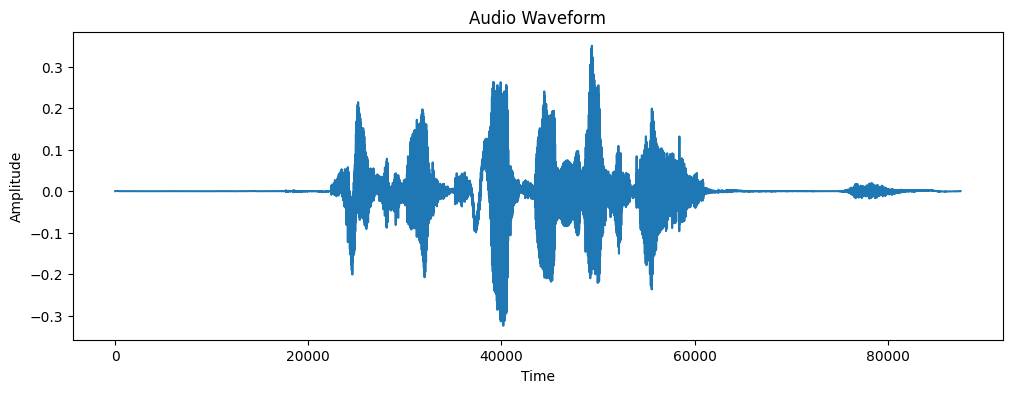

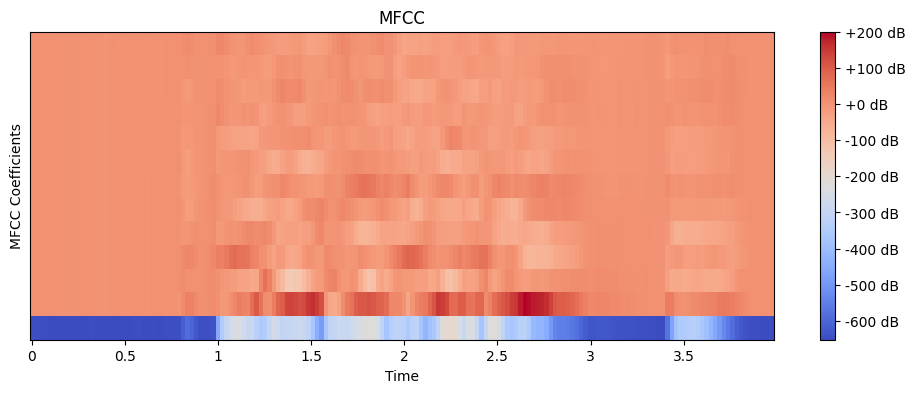

In [13]:
# Source - RAVDESS; Gender - Female; Emotion - Angry
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

path = "/content/drive/MyDrive/Colab Notebooks/RAVDESS Emotional Speech Audio/Audio_Speech_Actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"

X, sample_rate = librosa.load(path, sr=22050)

# Audio waveform
plt.figure(figsize=(12, 4))
plt.plot(X)
plt.title('Audio Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# MFCC
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sample_rate, hop_length=512, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')

# Play the audio
Audio(path)



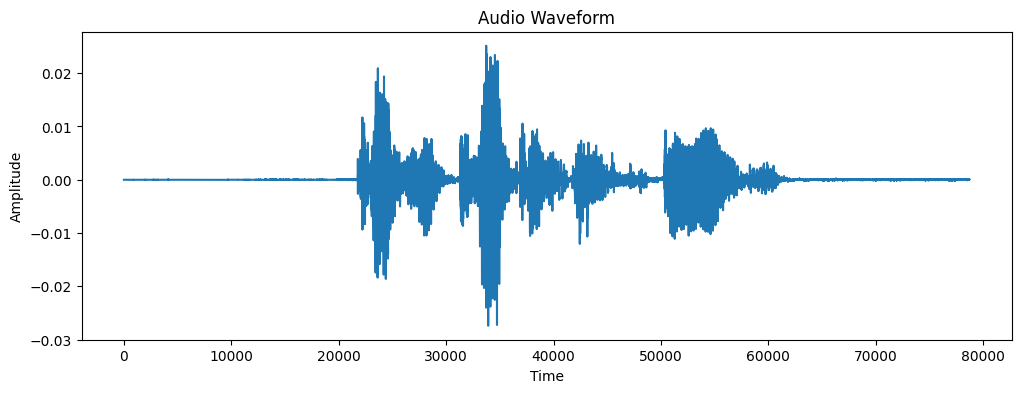

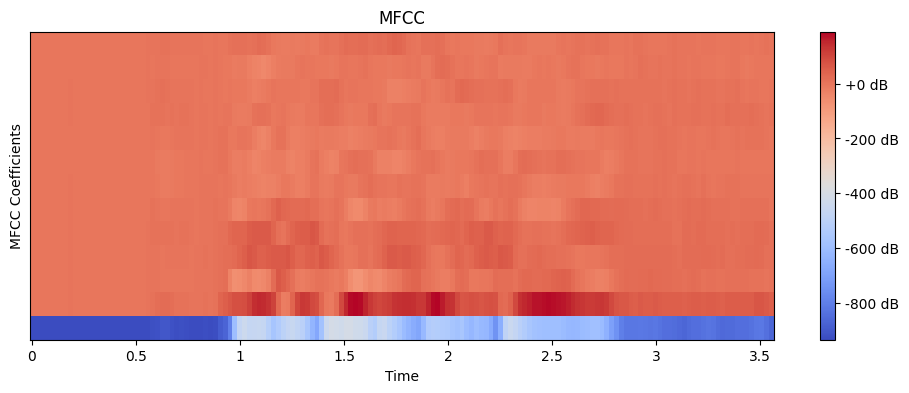

In [14]:
# Source - RAVDESS; Gender - Male; Emotion - Angry
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

path = "/content/drive/MyDrive/Colab Notebooks/RAVDESS Emotional Speech Audio/Audio_Speech_Actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"

X, sample_rate = librosa.load(path, sr=22050)

# Audio waveform
plt.figure(figsize=(12, 4))
plt.plot(X)
plt.title('Audio Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# MFCC
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sample_rate, hop_length=512, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')

# Play the audio
Audio(path)


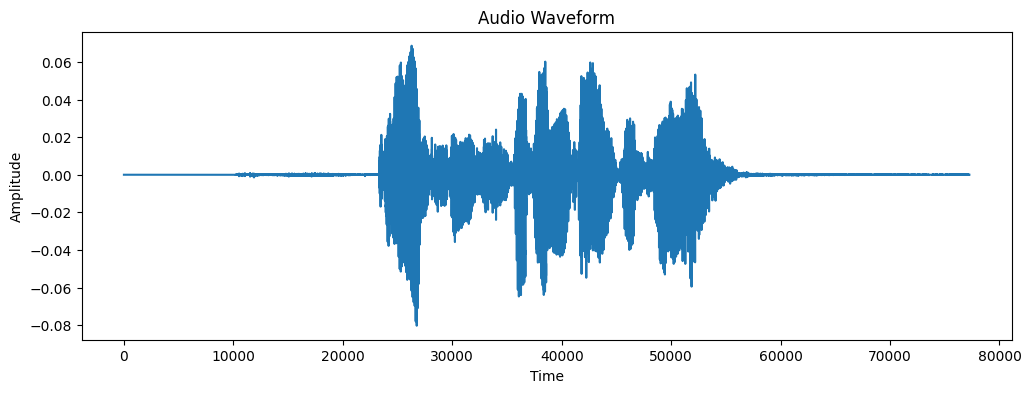

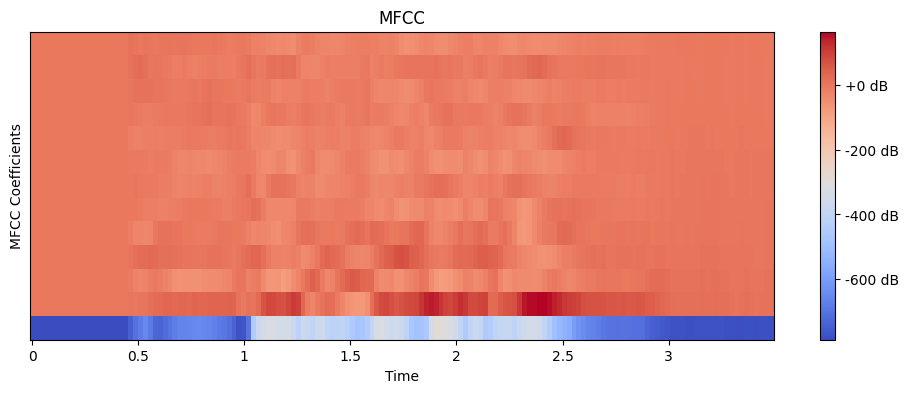

In [15]:
# Source - RAVDESS; Gender - Female; Emotion - Happy
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

path = "/content/drive/MyDrive/Colab Notebooks/RAVDESS Emotional Speech Audio/Audio_Speech_Actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"

X, sample_rate = librosa.load(path, sr=22050)

# Audio waveform
plt.figure(figsize=(12, 4))
plt.plot(X)
plt.title('Audio Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# MFCC
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sample_rate, hop_length=512, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')

# Play the audio
Audio(path)


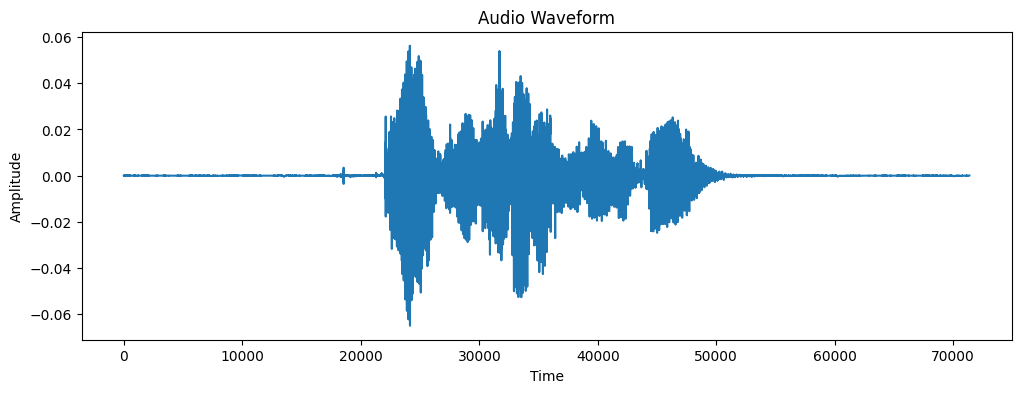

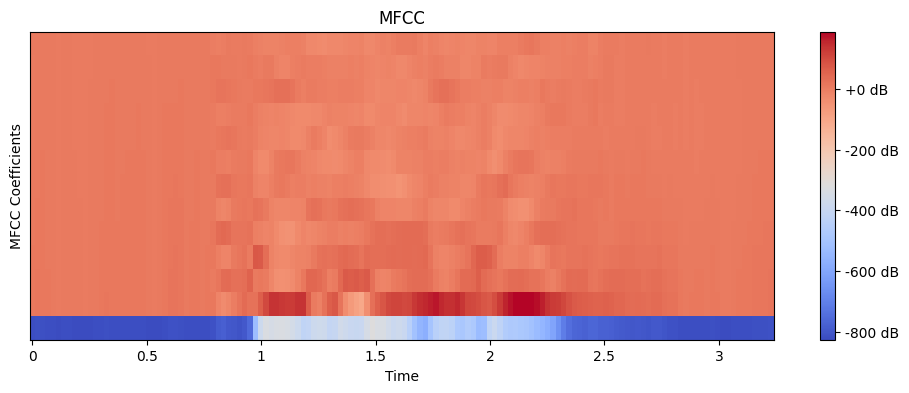

In [16]:
# Source - RAVDESS; Gender - Male; Emotion - Happy
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

path = "/content/drive/MyDrive/Colab Notebooks/RAVDESS Emotional Speech Audio/Audio_Speech_Actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"

X, sample_rate = librosa.load(path, sr=22050)

# Audio waveform
plt.figure(figsize=(12, 4))
plt.plot(X)
plt.title('Audio Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# MFCC
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sample_rate, hop_length=512, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')

# Play the audio
Audio(path)



172
154


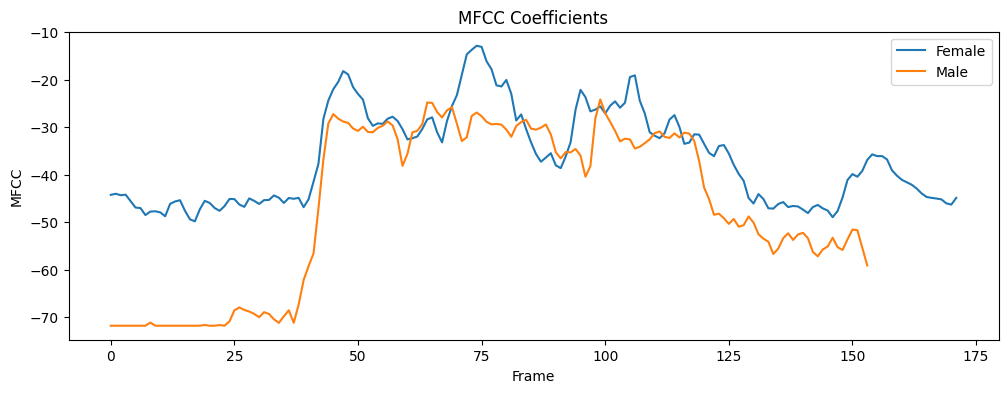

In [17]:

import numpy as np
import matplotlib.pyplot as plt
import librosa

# Source - RAVDESS; Gender - Female; Emotion - Angry
path_female = "/content/drive/MyDrive/Colab Notebooks/RAVDESS Emotional Speech Audio/Audio_Speech_Actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X_female, sample_rate_female = librosa.load(path_female, sr=22050)

female_mfcc = librosa.feature.mfcc(y=X_female, sr=sample_rate_female, n_mfcc=13)
female_mfcc_mean = np.mean(female_mfcc, axis=0)
print(len(female_mfcc_mean))

# Source - RAVDESS; Gender - Male; Emotion - Angry
path_male = "/content/drive/MyDrive/Colab Notebooks/RAVDESS Emotional Speech Audio/Audio_Speech_Actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X_male, sample_rate_male = librosa.load(path_male, sr=22050)

male_mfcc = librosa.feature.mfcc(y=X_male, sr=sample_rate_male, n_mfcc=13)
male_mfcc_mean = np.mean(male_mfcc, axis=0)
print(len(male_mfcc_mean))

# Audio wave
plt.figure(figsize=(12, 4))
plt.plot(female_mfcc_mean, label='Female')
plt.plot(male_mfcc_mean, label='Male')
plt.title('MFCC Coefficients')
plt.xlabel('Frame')
plt.ylabel('MFCC')
plt.legend()

plt.show()


151
140


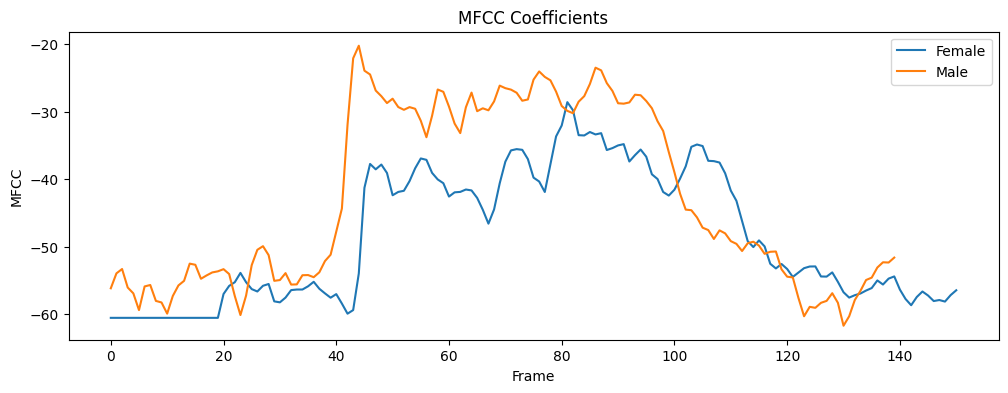

In [18]:

import numpy as np
import matplotlib.pyplot as plt
import librosa

# Source - RAVDESS; Gender - Female; Emotion - happy
path_female = "/content/drive/MyDrive/Colab Notebooks/RAVDESS Emotional Speech Audio/Audio_Speech_Actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X_female, sample_rate_female = librosa.load(path_female, sr=22050)

female_mfcc = librosa.feature.mfcc(y=X_female, sr=sample_rate_female, n_mfcc=13)
female_mfcc_mean = np.mean(female_mfcc, axis=0)
print(len(female_mfcc_mean))

# Source - RAVDESS; Gender - Male; Emotion - happy
path_male = "/content/drive/MyDrive/Colab Notebooks/RAVDESS Emotional Speech Audio/Audio_Speech_Actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X_male, sample_rate_male = librosa.load(path_male, sr=22050)

male_mfcc = librosa.feature.mfcc(y=X_male, sr=sample_rate_male, n_mfcc=13)
male_mfcc_mean = np.mean(male_mfcc, axis=0)
print(len(male_mfcc_mean))

# Plot the two audio waves together
plt.figure(figsize=(12, 4))
plt.plot(female_mfcc_mean, label='Female')
plt.plot(male_mfcc_mean, label='Male')
plt.title('MFCC Coefficients')
plt.xlabel('Frame')
plt.ylabel('MFCC')
plt.legend()

plt.show()


In [1]:
!pip install --upgrade tensorflow keras

# Importing required libraries
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

In [2]:
# lets pick up the meta-data that we got from our first part of the Kernel
ref = pd.read_csv("/content/Data_path.csv")
ref.head()

labels source                                               path
0  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...
1  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...
2  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...
3  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...
4  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import librosa

# Note this takes a couple of minutes (~10 mins) as we're iterating over 2 datasets
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  ,duration=2.5
                                  ,sr=22050
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)

    # mean as the feature. Could do min and max etc as well.
    mfccs = np.mean(librosa.feature.mfcc(y=X,
                                        sr=sample_rate,
                                        n_mfcc=13),
                                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1

# Check a few records to make sure its processed successfully
print(len(df))
df.head()
df.to_csv('features.csv', index=False)


1924


In [5]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

labels source                                               path  \
0  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...   
1  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...   
2  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...   
3  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...   
4  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...   

           0          1          2          3          4          5  \
0  -4.816541  -4.719582  -8.818765  -7.456907  -8.338639  -8.452946   
1  -9.715560 -13.124135 -13.733280 -11.639963  -9.757992  -7.799797   
2  -9.764192 -13.130981 -21.717010 -20.712687 -14.878439 -11.219197   
3  -6.904123  -9.077523 -12.571279 -11.803560 -12.712983 -12.177041   
4 -17.093000 -20.215595 -24.934872 -20.657362 -13.060372  -7.409640   

           6  ...         98        99       100       101        102  \
0  -9.316865  ...  -8.687522 -9.184772 -9.399124 -9.329719  -8.794366   
1  -9.298431  ...        NaN       NaN       NaN       NaN        NaN   
2 -11.041676  ...        NaN       NaN       NaN       NaN        NaN   
3 -10.413901  ... -10.189062 -9.643715 -9.229479 -9.367708  -8.450929   
4  -4.594509  ...  -9.069875 -9.088841 -7.878906 -7.977509 -10.389527   

         103        104        105        106       107  
0  -9.695253 -10.671360 -11.003892  -9.062118 -1.525003  
1        NaN        NaN        NaN        NaN       NaN  
2        NaN        NaN        NaN        NaN       NaN  
3  -8.791231  -9.073063  -8.801278  -9.794526 -6.667286  
4 -15.057249 -12.847073 -11.127901 -10.507704 -4.204310  

[5 rows x 111 columns]

In [6]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(1924, 111)


labels source                                               path  \
0  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...   
1  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...   
2  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...   
3  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...   
4  male_angry  SAVEE  /content/drive/MyDrive/Colab Notebooks/Savee/A...   

           0          1          2          3          4          5  \
0  -4.816541  -4.719582  -8.818765  -7.456907  -8.338639  -8.452946   
1  -9.715560 -13.124135 -13.733280 -11.639963  -9.757992  -7.799797   
2  -9.764192 -13.130981 -21.717010 -20.712687 -14.878439 -11.219197   
3  -6.904123  -9.077523 -12.571279 -11.803560 -12.712983 -12.177041   
4 -17.093000 -20.215595 -24.934872 -20.657362 -13.060372  -7.409640   

           6  ...         98        99       100       101        102  \
0  -9.316865  ...  -8.687522 -9.184772 -9.399124 -9.329719  -8.794366   
1  -9.298431  ...   0.000000  0.000000  0.000000  0.000000   0.000000   
2 -11.041676  ...   0.000000  0.000000  0.000000  0.000000   0.000000   
3 -10.413901  ... -10.189062 -9.643715 -9.229479 -9.367708  -8.450929   
4  -4.594509  ...  -9.069875 -9.088841 -7.878906 -7.977509 -10.389527   

         103        104        105        106       107  
0  -9.695253 -10.671360 -11.003892  -9.062118 -1.525003  
1   0.000000   0.000000   0.000000   0.000000  0.000000  
2   0.000000   0.000000   0.000000   0.000000  0.000000  
3  -8.791231  -9.073063  -8.801278  -9.794526 -6.667286  
4 -15.057249 -12.847073 -11.127901 -10.507704 -4.204310  

[5 rows x 111 columns]

In [7]:
# Split between train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation
X_train[150:160]

0          1          2          3          4          5    \
808  -44.472744 -45.134529 -45.654926 -46.003883 -45.477757 -45.776672   
914  -52.574532 -52.539658 -53.897190 -53.588608 -51.933994 -50.687664   
1553 -61.173740 -60.233807 -61.592205 -62.382629 -62.525532 -62.525532   
1871 -67.297691 -67.297691 -67.297691 -67.297691 -67.297691 -67.297691   
327  -17.209084 -19.626459 -17.633949 -10.829971  -7.710684  -6.970069   
962  -53.080261 -49.918297 -50.334126 -49.726067 -49.976009 -50.163395   
1576 -59.991173 -59.334072 -60.746746 -55.924831 -56.247593 -57.311783   
1749 -61.922707 -53.259659 -47.659279 -48.054337 -51.637203 -53.077499   
849  -65.114120 -64.885300 -64.981354 -65.224724 -65.382294 -65.461617   
807  -71.135445 -71.135445 -71.135445 -71.135445 -71.135445 -71.135445   

            6          7          8          9    ...        98         99   \
808  -46.387478 -46.246498 -44.731880 -43.334652  ... -40.280910 -39.838966   
914  -50.162716 -51.108566 -51.481968 -52.409897  ... -48.432320 -49.699726   
1553 -62.525532 -62.525532 -62.525532 -62.525532  ... -30.149126 -33.248974   
1871 -67.297691 -67.297691 -67.297691 -67.297691  ... -44.793297 -45.211460   
327   -1.258804   0.697444  -2.689196  -6.096603  ... -18.867460 -20.928593   
962  -50.461296 -51.757057 -51.038784 -52.097172  ... -47.850952 -50.403038   
1576 -53.981400 -52.235004 -51.261421 -52.237591  ... -30.604984 -30.774050   
1749 -52.824490 -53.028542 -54.065815 -55.296696  ... -43.462063 -44.919834   
849  -65.444809 -65.444809 -65.444809 -65.444809  ... -27.765003 -28.837881   
807  -71.135445 -71.135445 -71.135445 -71.135445  ... -60.111820 -61.107235   

            100        101        102        103        104        105  \
808  -41.446712 -41.603092 -42.242287 -42.873867 -44.059303 -44.030830   
914  -51.469131 -51.487160 -51.799553 -50.380714 -48.615463 -48.822304   
1553 -36.244041 -27.879963 -22.463968 -23.919962 -29.367207 -32.277229   
1871 -44.136723 -42.831081 -43.908127 -43.726181 -44.745197 -45.102497   
327  -21.915283 -20.628937 -18.742535 -19.595093 -23.171919 -22.333122   
962  -50.777012 -49.404171 -49.251442 -51.184734 -51.238979 -50.460472   
1576 -30.249020 -30.237144 -32.127018 -32.765903 -33.792786 -34.597019   
1749 -45.310513 -45.594376 -46.606979 -47.661690 -47.670933 -48.435356   
849  -29.769268 -31.161112 -32.147903 -31.972664 -32.157524 -33.115574   
807  -59.721619 -60.789005 -63.151230 -64.464996 -64.537888 -63.595432   

            106        107  
808  -43.973270 -37.249989  
914  -49.820255 -50.493820  
1553 -34.342045 -30.339073  
1871 -44.993084 -36.154934  
327   -9.768187  -1.965591  
962  -52.778381 -51.362144  
1576 -34.604336 -29.184572  
1749 -52.344185 -57.571480  
849  -36.046940 -39.605408  
807  -61.932835 -63.535385  

[10 rows x 108 columns]

In [8]:
# Lts do data normalization
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now
X_train[150:160]

0         1         2         3         4         5         6    \
808   0.039843  0.007141  0.069866  0.036383  0.059397  0.033536 -0.009385   
914  -0.358382 -0.379010 -0.416363 -0.402827 -0.312846 -0.248237 -0.224194   
1553 -0.781057 -0.780232 -0.870308 -0.912063 -0.923513 -0.927446 -0.927631   
1871 -1.082066 -1.148588 -1.206886 -1.196680 -1.198658 -1.201253 -1.199164   
327   1.379927  1.337294  1.722882  2.073202  2.236903  2.260101  2.558409   
962  -0.383240 -0.242315 -0.206170 -0.179158 -0.199956 -0.218156 -0.241183   
1576 -0.722931 -0.733314 -0.820432 -0.538111 -0.561551 -0.628302 -0.441475   
1749 -0.817871 -0.416555 -0.048375 -0.082353 -0.295734 -0.385356 -0.375648   
849  -0.974738 -1.022790 -1.070241 -1.076640 -1.088223 -1.095906 -1.093736   
807  -1.270702 -1.348713 -1.433284 -1.418913 -1.419928 -1.421447 -1.417530   

           7         8         9    ...       98        99        100  \
808  -0.012998  0.060985  0.128785  ... -0.217568 -0.164409 -0.236829   
914  -0.287655 -0.318465 -0.378642  ... -0.722336 -0.766415 -0.842351   
1553 -0.932594 -0.939270 -0.944240  ...  0.409834  0.237915  0.077500   
1871 -1.202172 -1.207533 -1.211067  ... -0.496993 -0.492403 -0.399351   
327   2.638846  2.424380  2.210887  ...  1.108440  0.990082  0.943197   
962  -0.324288 -0.293552 -0.361156  ... -0.686336 -0.809353 -0.800535   
1576 -0.351287 -0.306067 -0.369008  ...  0.381605  0.389011  0.439699   
1749 -0.396113 -0.463714 -0.540052  ... -0.414558 -0.474599 -0.470267   
849  -1.097503 -1.103375 -1.107467  ...  0.557468  0.507215  0.468684   
807  -1.418965 -1.423269 -1.425649  ... -1.445579 -1.462851 -1.340939   

           101       102       103       104       105       106       107  
808  -0.216577 -0.226170 -0.241265 -0.286870 -0.269236 -0.262383  0.007444  
914  -0.809564 -0.793721 -0.680724 -0.550222 -0.543940 -0.589932 -0.650490  
1553  0.606731  0.948350  0.868319  0.562351  0.404618  0.277161  0.350769  
1871 -0.290249 -0.325095 -0.291160 -0.326516 -0.330677 -0.319513  0.061845  
327   1.041750  1.169344  1.121502  0.920446  0.974732  1.653793  1.760323  
962  -0.684596 -0.642403 -0.727793 -0.701864 -0.637859 -0.755647 -0.693628  
1576  0.465314  0.374517  0.350467  0.306547  0.271621  0.262467  0.408123  
1749 -0.456031 -0.485364 -0.521550 -0.495627 -0.521755 -0.731323 -1.002099  
849   0.409881  0.373277  0.396904  0.401067  0.356555  0.181652 -0.109570  
807  -1.367620 -1.467831 -1.505235 -1.470557 -1.390909 -1.268481 -1.298377  

[10 rows x 108 columns]

In [9]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Lets few preparation steps to get it into the correct format for Keras
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(1443, 108)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [10]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(1443, 108, 1)

In [11]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 108, 256)            │           2,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 108, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 108, 256)            │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 108, 256)            │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 108, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 108, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 13, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 13, 128)             │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 13, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 13, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 13, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 13, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 13, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 13, 128)             │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 13, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 13, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 1, 64)               │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,283,598 (4.90 MB)

 Trainable params: 1,282,830 (4.89 MB)

 Non-trainable params: 768 (3.00 KB)

In [12]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.1291 - loss: 2.6100 - val_accuracy: 0.0998 - val_loss: 2.6377
Epoch 2/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2054 - loss: 2.5429 - val_accuracy: 0.1435 - val_loss: 2.6356
Epoch 3/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.1914 - loss: 2.5202 - val_accuracy: 0.1830 - val_loss: 2.6307
Epoch 4/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2063 - loss: 2.4787 - val_accuracy: 0.2017 - val_loss: 2.6178
Epoch 5/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.1829 - loss: 2.4505 - val_accuracy: 0.2162 - val_loss: 2.5904
Epoch 6/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2002 - loss: 2.4313 - val_accuracy: 0.2225 - val_loss: 2.5449
Epoch 7/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2177 - loss: 2.3903 - val_accuracy: 0.2245 - val_loss: 2.4964
Epoch 8/100
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.2027 - loss: 2.3982 - val_accuracy: 0.

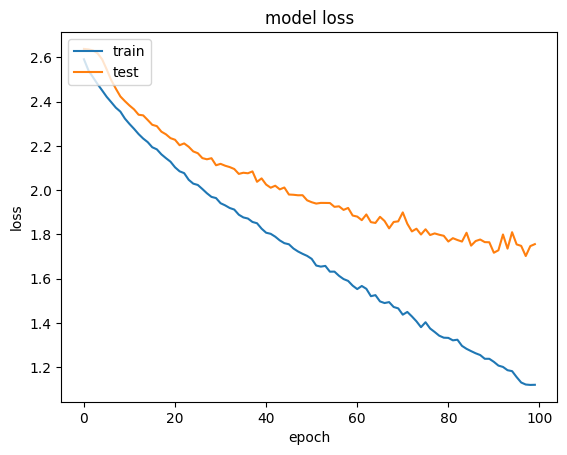

In [13]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# Save model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at /content/saved_models/Emotion_Model.h5 


In [15]:
# loading json and model architecture
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")

# Keras optimiser
# Keras optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.00001)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)

print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
compile_metrics: 39.92%


In [16]:
preds = loaded_model.predict(X_test,
                         batch_size=16,
                         verbose=1)

preds=preds.argmax(axis=1)
preds

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


array([10, 13, 12,  0,  9,  0, 11, 12, 11,  4,  9,  7,  3,  4,  2, 11,  4,
       11, 12,  4,  6,  2,  0, 10, 11, 11,  7,  3,  7,  0,  5,  4,  5, 11,
       11,  9,  2,  7, 12,  4, 11, 12, 11,  2, 11, 11,  4,  4,  3,  2, 13,
       11,  1, 10, 11, 13, 11, 11, 11, 11,  4,  3, 11,  4,  9,  7,  9, 13,
        7, 12,  8,  7, 13,  3,  4, 11, 11, 11, 11, 12,  5, 11,  9,  7,  9,
        0,  2, 11,  2,  0,  2,  9,  6,  7,  9, 11, 12, 11, 11,  5, 12,  9,
        1,  8,  8,  8,  8, 11,  6,  7, 11, 11,  7,  8, 11,  1,  5,  2,  7,
        9,  4,  2,  5, 11, 12,  4,  7,  1,  4, 12,  7,  9, 10,  0, 10,  4,
       13,  6, 12, 11,  2, 13,  8, 11,  0,  4,  9,  2,  6, 10,  9,  4,  4,
        1,  1, 11, 11, 11, 13, 11, 11, 11,  7,  0,  3,  8,  9, 11, 13, 11,
       11, 11, 13, 11,  0, 13, 12,  3,  8,  8,  0, 11,  5, 11, 10,  9,  7,
        8,  9,  8,  6,  7,  2,  4,  6,  0,  0, 11, 12,  2, 12, 11,  0, 11,
        7, 10,  9,  4, 13, 11, 12,  9,  5,  4,  4,  4, 11, 13, 11,  7, 11,
       11,  4,  8,  4,  5

In [17]:
# predictions
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

actualvalues predictedvalues
170      male_fear    male_neutral
171     male_happy    male_neutral
172  male_surprise   male_surprise
173     male_happy    male_neutral
174  male_surprise    female_angry
175     male_happy   male_surprise
176   male_disgust        male_sad
177   female_happy    female_happy
178     male_angry    male_disgust
179      male_fear    male_disgust

In [18]:
# Write out the predictions to disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues              
female_angry               27
female_disgust             11
female_fear                27
female_happy               18
female_neutral             63
female_sad                 25
female_surprise            15
male_angry                 41
male_disgust               32
male_fear                  44
male_happy                 16
male_neutral              105
male_sad                   32
male_surprise              25

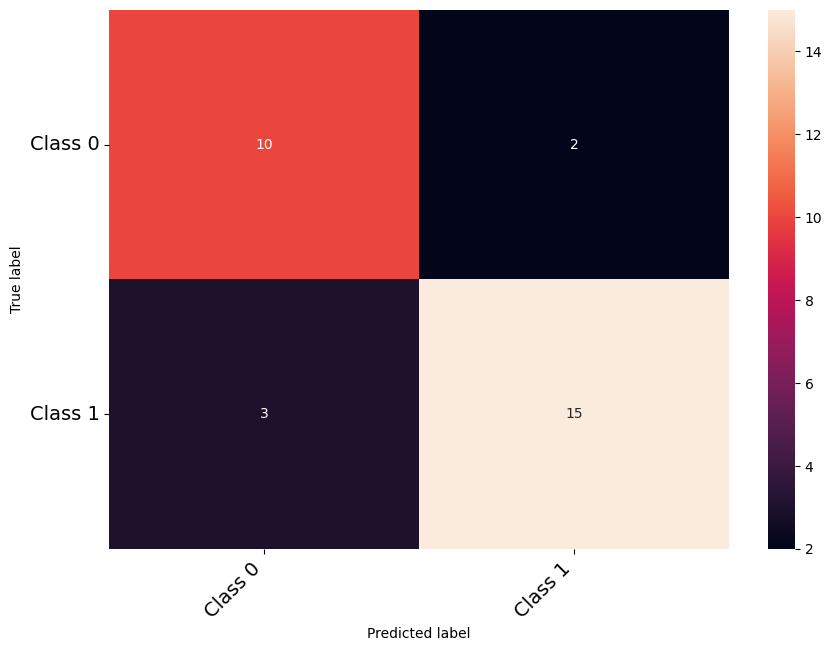

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix and class names
cm = np.array([[10, 2], [3, 15]])
class_names = ['Class 0', 'Class 1']

# Gender recode function
def gender(row):
    if row in ['female_disgust', 'female_fear', 'female_happy', 'female_sad', 'female_surprise', 'female_neutral']:
        return 'female'
    elif row in ['male_angry', 'male_fear', 'male_happy', 'male_sad', 'male_surprise', 'male_neutral', 'male_disgust']:
        return 'male'
    else:
        return 'unknown'

# Confusion matrix plotting function
def print_confusion_matrix(confusion_matrix, class_names, figsize=(10, 7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

# Call the print_confusion_matrix function
fig = print_confusion_matrix(cm, class_names)
plt.show()  # Display the plot


0.3991683991683992


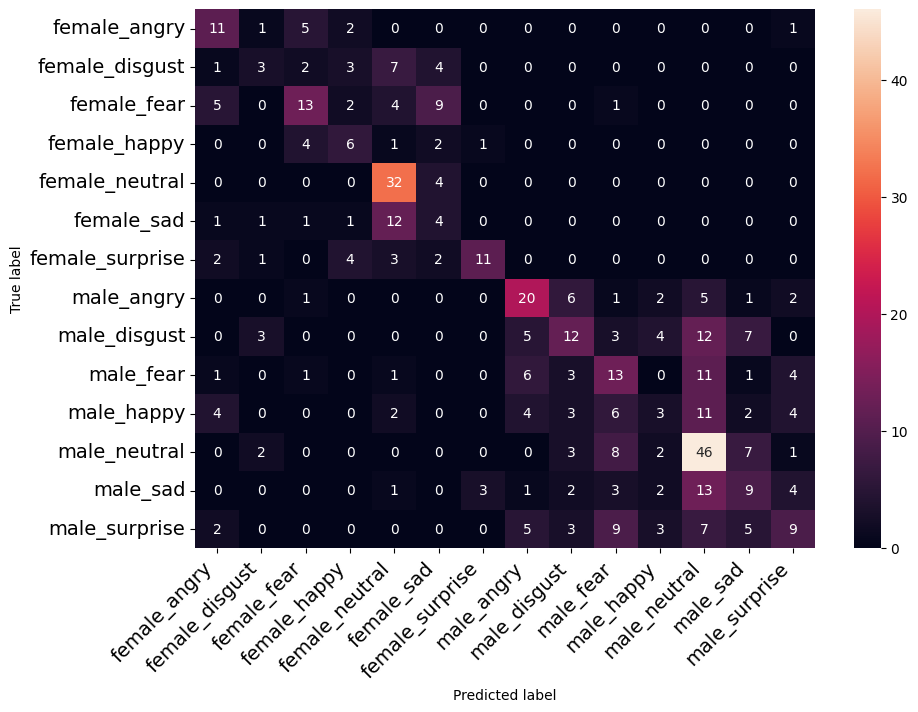

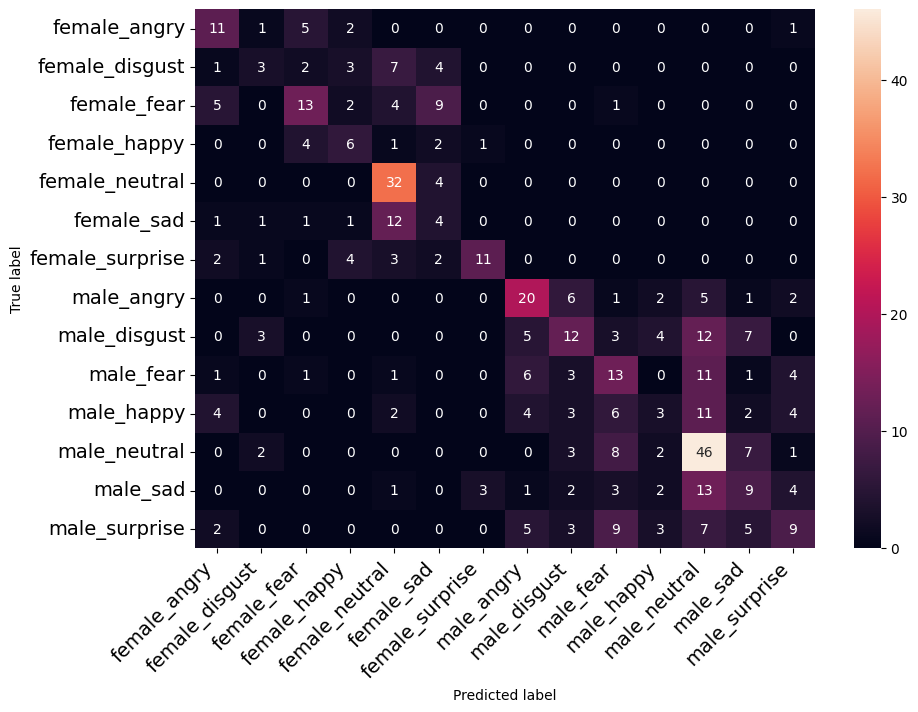

In [20]:
# Get the predictions file
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()

# Confusion matrix
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [21]:
# Classification report
classes = finaldf.actualvalues.unique()
classes.sort()
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.41      0.55      0.47        20
 female_disgust       0.27      0.15      0.19        20
    female_fear       0.48      0.38      0.43        34
   female_happy       0.33      0.43      0.38        14
 female_neutral       0.51      0.89      0.65        36
     female_sad       0.16      0.20      0.18        20
female_surprise       0.73      0.48      0.58        23
     male_angry       0.49      0.53      0.51        38
   male_disgust       0.38      0.26      0.31        46
      male_fear       0.30      0.32      0.31        41
     male_happy       0.19      0.08      0.11        39
   male_neutral       0.44      0.67      0.53        69
       male_sad       0.28      0.24      0.26        38
  male_surprise       0.36      0.21      0.26        43

       accuracy                           0.40       481
      macro avg       0.38      0.38      0.37       481
   weighted avg       0.38   

0.9521829521829522


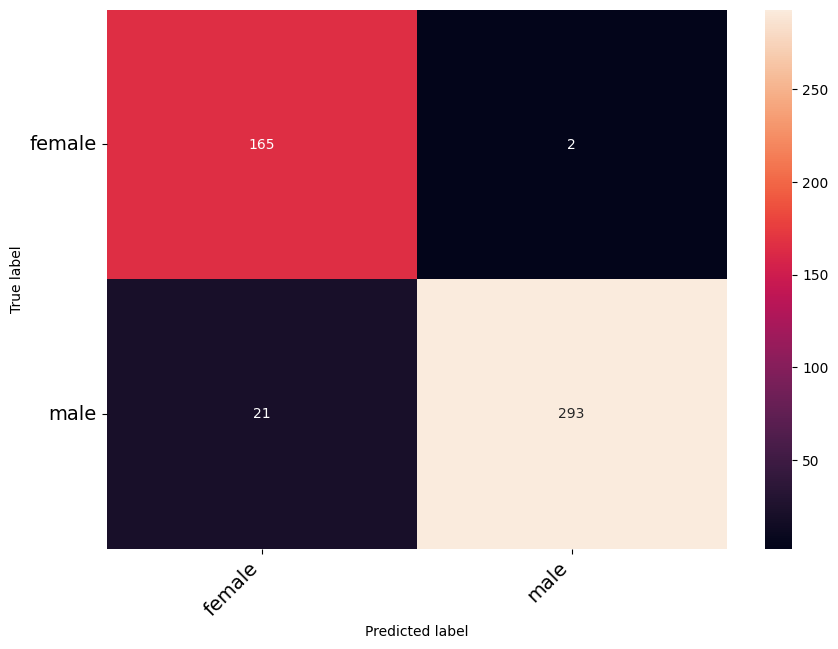

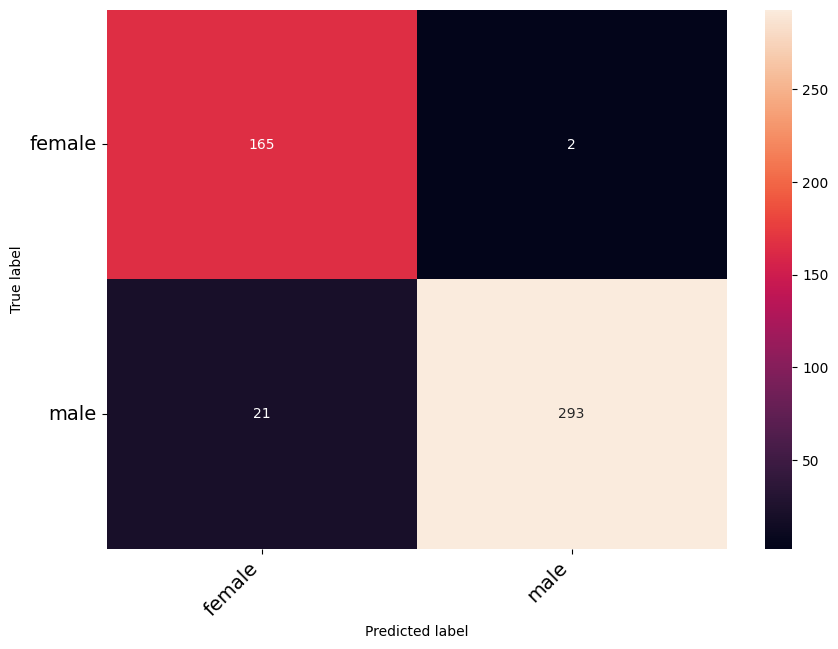

In [22]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()
classes.sort()

# Confusion matrix
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [23]:
# Classification report
classes = modidf.actualvalues.unique()
classes.sort()
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.89      0.99      0.93       167
        male       0.99      0.93      0.96       314

    accuracy                           0.95       481
   macro avg       0.94      0.96      0.95       481
weighted avg       0.96      0.95      0.95       481



0.4095634095634096


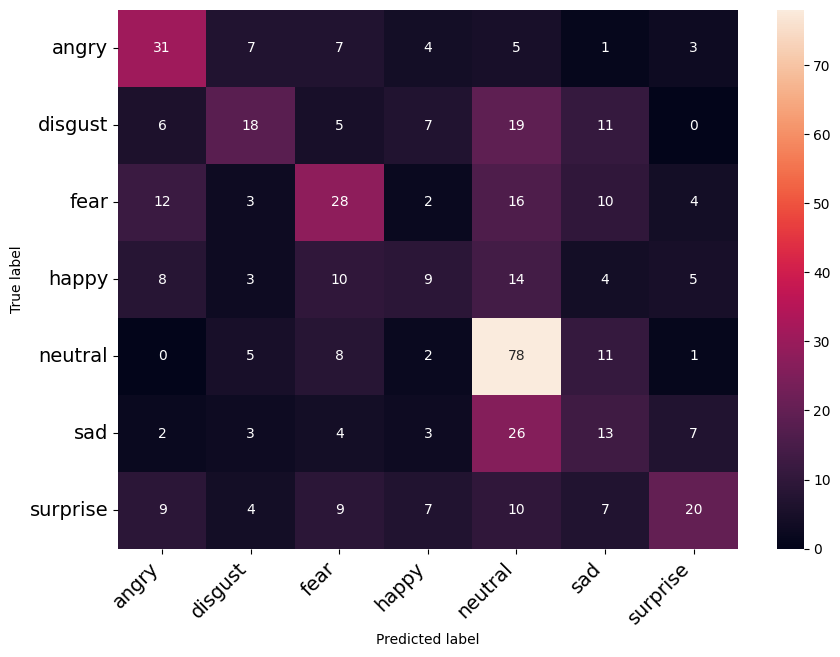

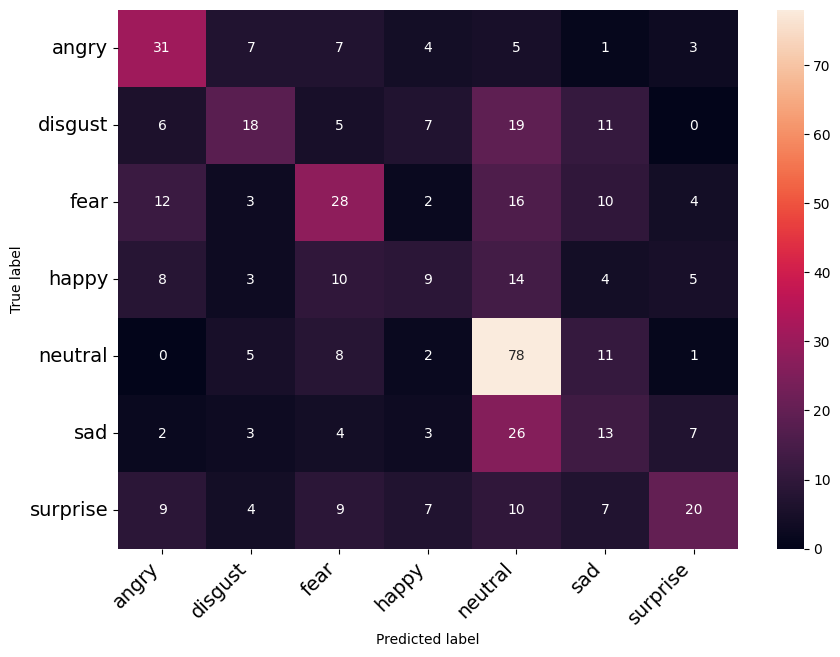

In [24]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique()
classes.sort()

# Confusion matrix
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [25]:
# Classification report
classes = modidf.actualvalues.unique()
classes.sort()
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.46      0.53      0.49        58
     disgust       0.42      0.27      0.33        66
        fear       0.39      0.37      0.38        75
       happy       0.26      0.17      0.21        53
     neutral       0.46      0.74      0.57       105
         sad       0.23      0.22      0.23        58
    surprise       0.50      0.30      0.38        66

    accuracy                           0.41       481
   macro avg       0.39      0.37      0.37       481
weighted avg       0.40      0.41      0.39       481



In [26]:
from keras.models import Sequential, Model, model_from_json
import matplotlib.pyplot as plt
import keras
import pickle
import wave  # !pip install wave
import os
import pandas as pd
import numpy as np
import sys
import warnings
import librosa
import librosa.display
import IPython.display as ipd  # To play sound in the notebook

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [27]:
data, sampling_rate = librosa.load('/content/drive/MyDrive/Colab Notebooks/happy-audio/khyati.wav')
ipd.Audio('/content/drive/MyDrive/Colab Notebooks/happy-audio/khyati.wav')

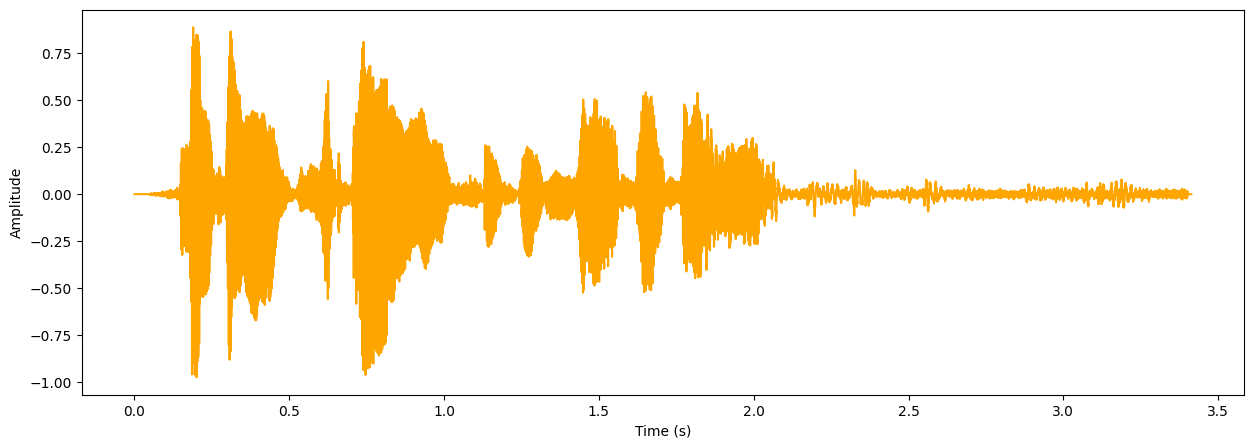

In [28]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
audio_path = '/content/drive/MyDrive/Colab Notebooks/happy-audio/khyati.wav'
signal, sr = librosa.load(audio_path, sr=None)

# Calculate time axis in seconds
time = np.arange(0, len(signal)) / sr

# Create waveform plot
plt.figure(figsize=(15, 5))
plt.plot(time, signal, color='orange')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [29]:
# loading json and model architecture
json_file = open('/content/model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights('/content/saved_models/Emotion_Model.h5')
print("Loaded model from disk")

# the optimiser
opt = keras.optimizers.RMSprop(learning_rate=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Loaded model from disk


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [30]:
import librosa
import numpy as np

# Load audio file
audio_path = '/content/drive/MyDrive/Colab Notebooks/happy-audio/khyati.wav'
audio, sr = librosa.load(audio_path)

# Extract MFCC features
mfcc = librosa.feature.mfcc(y=audio, sr=sr)
mfcc_delta = librosa.feature.delta(mfcc)

# Concatenate MFCC and delta features
features = np.concatenate((mfcc, mfcc_delta), axis=0)
print(features.shape)

(40, 148)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Predicted Emotion: male_neutral


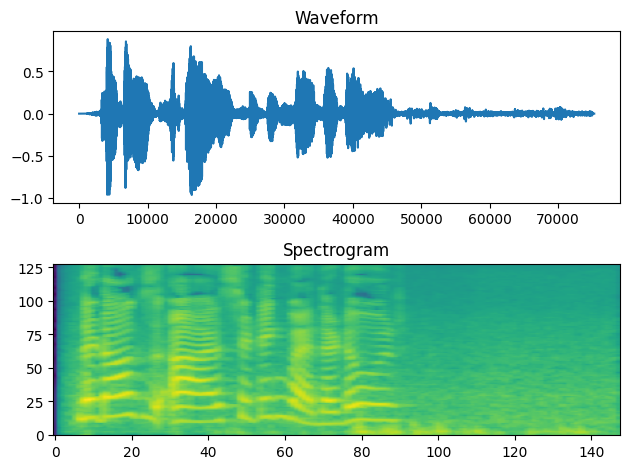

In [32]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("/content/saved_models/Emotion_Model.h5")

# Function to preprocess the audio
def preprocess_audio(audio_path):
    waveform, sample_rate = librosa.load(audio_path)
    spectrogram = librosa.feature.melspectrogram(y=waveform, sr=sample_rate)

    return waveform, spectrogram

# Function to extract features from the spectrogram
def extract_features(spectrogram):
    features = np.mean(spectrogram.T, axis=0)
    return features

# Function to classify the emotion
# Updated function to classify the emotion
def classify_emotion(features):
    # Perform feature scaling
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features.reshape(1, -1))

    # Reshape features to match the expected input shape of the model
    desired_length = 108
    padded_features = np.zeros((desired_length, 1))
    num_frames = min(desired_length, scaled_features.shape[0])
    padded_features[:num_frames, 0] = scaled_features[:num_frames, 0]

    reshaped_features = padded_features.reshape(1, desired_length, 1)

    # Predict the emotion label
    predicted_probabilities = model.predict(reshaped_features)
    predicted_label = np.argmax(predicted_probabilities)
    emotions = ['female_angry', 'female_disgust', 'female_fear', 'female_happy', 'female_neutral', 'female_sad', 'female_surprise', 'male_angry', 'male_disgust', 'male_fear', 'male_happy', 'male_neutral', 'male_sad', 'male_surprise']

    predicted_emotion = emotions[predicted_label]
    return predicted_emotion



# Audio processing and emotion classification
audio_path = "/content/drive/MyDrive/Colab Notebooks/happy-audio/khyati.wav"
waveform, spectrogram = preprocess_audio(audio_path)
features = extract_features(spectrogram)
predicted_emotion = classify_emotion(features)

# Display the predicted emotion
print(f'Predicted Emotion: {predicted_emotion}')

# Plot the waveform
plt.subplot(2, 1, 1)
plt.plot(waveform)
plt.title('Waveform')

# Plot the spectrogram
plt.subplot(2, 1, 2)
plt.imshow(np.log(spectrogram), aspect='auto', origin='lower')
plt.title('Spectrogram')

plt.tight_layout()
plt.show()

